# IDW

This exercise is build around the IDW - inverse distance weights - algorithm. Here, you should learn how to code a basic algorithm yourself. That means, do not simply import one of the many available IDW algorithms, but code it yourself.

The code shown here is optimized for easy understanding, not performance.

## Loading data

This first part loads the data from google drive and prepares it for geo-spatial analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pathlib import Path
import math
import pandas as pd
import pyproj

# You need to change this path to match your google drive
PATH = Path('/content/drive/MyDrive/Geostatistics/content/data')

In [ ]:
input_data = pd.read_csv(PATH / 'precipitation_sums_2022-2023.csv')
input_data

In [ ]:
# We need to transform from WGS84 to UTM coordinates
src = pyproj.crs.CRS.from_epsg(4326)
tgt = pyproj.crs.CRS.from_epsg(25832)
transform = pyproj.Transformer.from_crs(src, tgt)

In [ ]:
# to get input data in the right resoultion, we copy the relevant stations from the file
# we will also only use data from Baden-Württemberg
sample = input_data.where(input_data.state =='Baden-Württemberg').dropna(how='all')[['longitude', 'latitude', 'value']]

# now transform
proj_coords = [transform.transform(row.longitude, row.latitude) for _, row in sample.iterrows()]
sample['x'] = [p[0] for p in proj_coords]
sample['y'] = [p[1] for p in proj_coords]

# drop longitude and latitude again
sample.drop(['longitude', 'latitude'], axis='columns', inplace=True)
sample

## IDW alogrithm

In this part you should implement the IDW algorithm for one point.

In [ ]:
# first of all, we create a convex hull from the input data
from shapely.geometry import MultiPoint, Point

points = MultiPoint(list(zip(sample.x, sample.y)))
convex_hull = points.convex_hull

print(points.bounds)
convex_hull

In [ ]:
# You can either add an actual location here, or generate a random locations with my code
import random

def random_point():
  return [
      random.randint(int(points.bounds[0]), int(points.bounds[2])),   # x-coordinate
      random.randint(int(points.bounds[1]), int(points.bounds[3]))    # y-coordinate
  ]

# set a seed so that we all get the same value
random.seed(42)

# initial guess
location = random_point()

# run a loop to create new locations until the location is not only in the
# bounding box, but also in the convex hull
while not convex_hull.contains(Point(location)):
  # do the same thing
  location = random_point()

# finally we have a location
location

### Task 4.1

Complete the cell below by replacnig `pass` with the actual algorithm to interpolate the value at the location `(x, y)`

In [ ]:
# Here is your assignment:
from math import sqrt

def idw_point(x, y, coordinates, values, p = 1) -> float:
  # calculate the distances
  dist = [sqrt((x - p[0])**2 + (y - p[1])**2) for p in coordinates]

  # derive the weights
  weights = []                      # <- CHANGE THIS

  # weighted sum
  weighted_sum = 42                 # <- CHANGE THIS

  return weighted_sum

If you don't change the random seed in `random_point`, you can use this cell to test your code. As long as it raises an `AssertionError`, it did not deliver the expected result

In [ ]:
# test your code

coordinates = sample[['x', 'y']].values.tolist()
values = sample.value.values.tolist()

prediction = idw_point(location[0], location[1], coordinates, values)

# test
assert prediction - 1946.87 < 0.1
print(f"Rainfall at location ({location[0]}, {location[1]}): {prediction}")

### Task 4.2

Complete the cell below, in order to create a grid


In [ ]:
# Set the cell size in meter
cell_size = 5000

# generate a bounding box from the sample
minx =
miny =
maxx =
maxy =

# create the x-coordinates
x_coords = list(range(minx, maxx + cell_size, cell_size))
y_coords = list(range(miny, maxy + cell_size, cell_size))

# calculate the grid size
grid_size = (len(x_coords), len(y_coords))

# grid container - we just list the coordinate combinations in long 1D array
grid = []

for x in x_coords:
  for y in y_coords:
    grid.append([x, y])

print(f"Generated a grid of size: {grid_size}")


### Task 4.3

Now apply the point function to the list of coordinates.

In [ ]:
# this is just a progress bar
from tqdm import tqdm

# create a container for the result
prediction = []

# go for each location
for (x, y) in tqdm(grid):
  # do something here


### Bonus

Plot your result. For that, you need to transform your data into a meshgrid

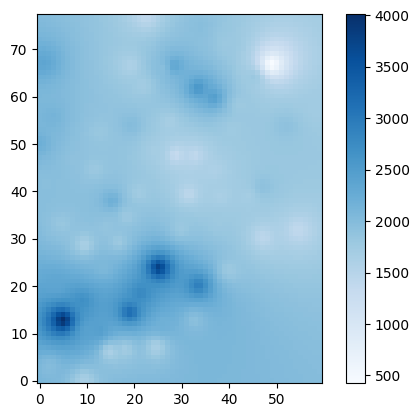

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a grid of all x-coordinates and y-coordinates
xx, yy = np.meshgrid(x_coords, y_coords)

# reshape the predictions to match the grid. Then transpose to have the rows in the correct order
pred = np.asarray(prediction).reshape(grid_size).T

plt.imshow(pred, origin='lower', cmap='Blues')
plt.colorbar()